# Pre-Processing Data

## Import Data
This data was collected through "Survey 1 - Rating Facebook Content Appropriateness"

In [106]:
# General Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import time

# SK Learn Libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Other Libraries
from astropy.table import Table
from astropy.io import ascii
from collections import Counter
from collections import OrderedDict

In [107]:
# Create Bag of Words Numpy Array
df = pd.read_csv("Data/results.csv", delimiter=",")

## Edit Data

### Drop rows that do not contain information about question responses.

Drop the first 151 rows of responses due to survey response issues that would violate research integrity.

In [108]:
# Drop Rows
drop_rows = list(range(0, 151))
df.drop(drop_rows, inplace=True)
df.reset_index(drop=True, inplace=True)

### Drop rows for responses that took less than 300 seconds to complete

In [109]:
drop_300 = []
for i in range(2, len(df.index)):
    if int(df.iloc[i, 5]) < 300: 
        drop_300.append(i)
df.drop(drop_300, inplace=True)

In [110]:
df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q30,Q31,Q33,Q34,Q35,Q36,Q37,Q39,Q40,Q40 - Topics
0,2019-03-19 08:30:37,2019-03-19 14:54:15,IP Address,*******,100,23017,True,2019-03-19 14:54:16,R_2S3q8HXZtVZzeMn,*******,...,5,3,3,2,4,4,5,No,NaN,NaN
1,2019-03-19 14:51:08,2019-03-19 14:56:47,IP Address,*******,100,338,True,2019-03-19 14:56:47,R_1ie4aIWHHJzHhX7,*******,...,4,5,1,6,7,1,1,No,NaN,NaN
2,2019-03-19 15:05:12,2019-03-19 15:13:50,IP Address,*******,100,518,True,2019-03-19 15:13:51,R_4YZDPcdbRnogIEx,*******,...,3,5,5,3,3,6,2,No,NaN,NaN
4,2019-03-19 14:53:38,2019-03-19 15:16:50,IP Address,*******,100,1392,True,2019-03-19 15:16:51,R_1Ih1OKCsx4Uq6K7,*******,...,4,3,5,2,3,4,4,Yes,https://m.facebook.com/mara.harwin?tsid=0.3064...,Unknown
5,2019-03-19 15:16:55,2019-03-19 15:23:44,IP Address,*******,100,408,True,2019-03-19 15:23:45,R_3Mm7ByY3BmlrL4A,*******,...,5,5,7,5,5,2,1,No,NaN,NaN
6,2019-03-19 15:14:34,2019-03-19 15:28:44,IP Address,*******,100,849,True,2019-03-19 15:28:45,R_yqhMS4maSLG1IHf,*******,...,4,4,1,7,4,NaN,1,Yes,https://www.facebook.com/slumdawg.millieonaire,Unknown
7,2019-03-19 15:42:50,2019-03-19 15:48:39,IP Address,*******,100,348,True,2019-03-19 15:48:40,R_pbZpPRX08pcCYJr,*******,...,2,4,3,5,5,3,2,No,NaN,NaN
8,2019-03-19 14:34:16,2019-03-19 15:56:41,IP Address,*******,100,4945,True,2019-03-19 15:56:42,R_3D0Zaoc3WhglNBb,*******,...,1,1,1,4,4,1,1,Yes,https://www.facebook.com/jack.wolfgramm.9,Unknown
9,2019-03-19 15:57:34,2019-03-19 16:16:17,IP Address,*******,100,1122,True,2019-03-19 16:16:17,R_3nv1w5ooZ8hFXgV,*******,...,5,5,2,6,6,2,3,No,NaN,NaN
10,2019-03-19 16:05:37,2019-03-19 16:18:06,IP Address,*******,100,748,True,2019-03-19 16:18:07,R_puzts7jVSuE3MJj,*******,...,3,3,3,5,3,5,5,Yes,NaN,NaN


### Restructure data

In [111]:
# Export edited data 
df.to_csv('Data/results_edited_dropped_300.csv', index=False)

In [112]:
# Drop Columns
df = pd.read_csv("Data/results_edited_dropped_300.csv", delimiter=",")
drop_columns = ['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId', 'RecipientLastName', 'RecipientFirstName', 'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 'DistributionChannel', 'UserLanguage', 'Q39', 'Q40', 'Q40 - Topics', 'Q41']
df = df.drop(columns=drop_columns, axis=1)
df.shape

(412, 25)

### Replace remaining NaNs

In [113]:
# Replace NaN's with the mode
# df = df.fillna(df.mode().iloc[0])
df.dropna(inplace=True)
df

,Q3,Q4,Q5,Q6,Q7,Q10,Q12,Q14,Q16,Q18,...,Q27,Q28,Q29,Q30,Q31,Q33,Q34,Q35,Q36,Q37
0,2.0,1.0,3.0,5.0,2.0,2.0,4.0,6.0,3.0,3.0,...,3.0,2.0,4.0,5.0,3.0,3.0,2.0,4.0,4.0,5.0
1,1.0,6.0,1.0,2.0,1.0,5.0,2.0,1.0,1.0,2.0,...,1.0,7.0,6.0,4.0,5.0,1.0,6.0,7.0,1.0,1.0
2,5.0,7.0,6.0,1.0,5.0,7.0,3.0,3.0,2.0,5.0,...,2.0,7.0,4.0,3.0,5.0,5.0,3.0,3.0,6.0,2.0
3,1.0,2.0,4.0,1.0,6.0,6.0,3.0,1.0,2.0,5.0,...,1.0,6.0,5.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0
4,4.0,7.0,7.0,3.0,3.0,6.0,1.0,1.0,1.0,2.0,...,1.0,7.0,5.0,5.0,5.0,7.0,5.0,5.0,2.0,1.0
6,3.0,6.0,5.0,1.0,3.0,6.0,3.0,3.0,1.0,3.0,...,1.0,6.0,5.0,2.0,4.0,3.0,5.0,5.0,3.0,2.0
7,7.0,7.0,2.0,1.0,4.0,3.0,1.0,3.0,2.0,2.0,...,1.0,7.0,7.0,1.0,1.0,1.0,4.0,4.0,1.0,1.0
8,5.0,6.0,4.0,2.0,3.0,4.0,2.0,2.0,3.0,5.0,...,3.0,7.0,5.0,5.0,5.0,2.0,6.0,6.0,2.0,3.0
9,5.0,7.0,5.0,1.0,5.0,5.0,3.0,3.0,3.0,6.0,...,1.0,3.0,2.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0
10,3.0,4.0,1.0,1.0,2.0,6.0,2.0,2.0,2.0,6.0,...,1.0,7.0,5.0,3.0,4.0,1.0,3.0,5.0,1.0,3.0


In [114]:
# Export edited data 
df.to_csv('Data/results_no_metadata_dropped_300.csv', index=False)

In [115]:
# Convert all data to integers
df = pd.read_csv("Data/results_no_metadata_dropped_300.csv", delimiter=",", dtype=int)
response_numbers = len(df)
df = df.transpose()
index = df.index.values
df.shape

(25, 367)

### Isolate Community Standards

In [116]:
def isolate_data(a, b):
    data = df.iloc[a:b]
    return data, data.index.values

In [117]:
hate, hate_index = isolate_data(0, 5)
nudity, nudity_index = isolate_data(5, 10)
cruel, cruel_index = isolate_data(10, 15)
spam, spam_index = isolate_data(15, 20)
false, false_index = isolate_data(20, 25)

## Analyze Data

### Means and Variances

In [118]:
# Define function for getting means and variances
def get_stat(data):
    means = []
    sds = []    
    for i in range(len(data)):
        m = np.round(np.mean(data.iloc[i]), decimals=4)
        sd = np.round(np.std(data.iloc[i]), decimals=4)
        means.append(m)
        sds.append(sd) 
    return means, sds

In [119]:
# Get means and standard deviations for overall dataset
means, sds = get_stat(df)   

# Get means and standard deviations for each Community Standard
hate_means, hate_sds = get_stat(hate)
nudity_means, nudity_sds = get_stat(nudity)
cruel_means, cruel_sds = get_stat(cruel)
spam_means, spam_sds = get_stat(spam)
false_means, false_sds = get_stat(false)

#for i in range(len(index)):
    #print('%s: means=%.2f sd=%.2f' %(index[i], means[i], sds[i]))

### Figures for Means and Variances

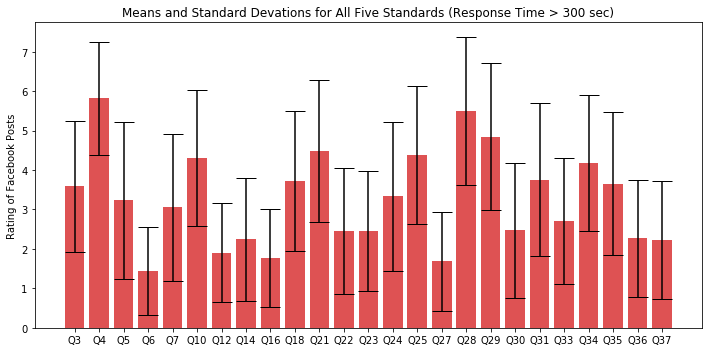

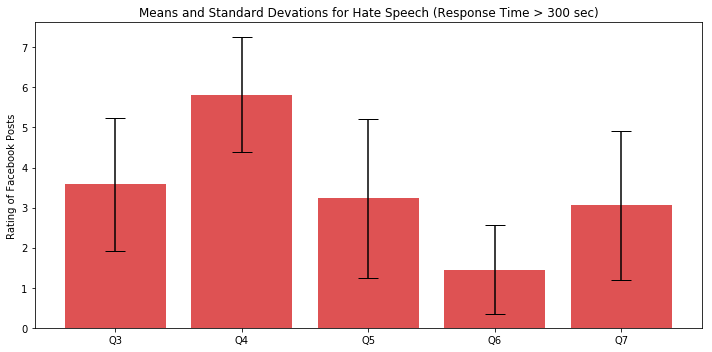

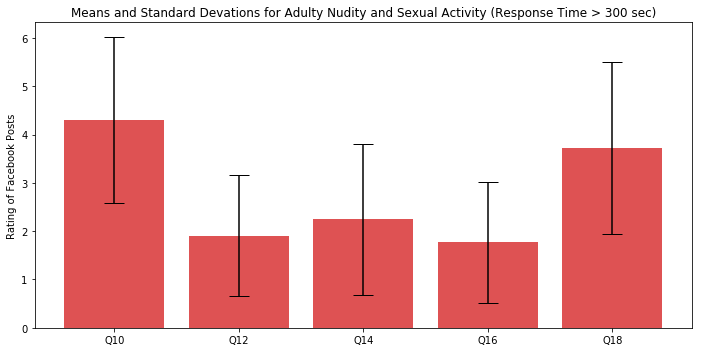

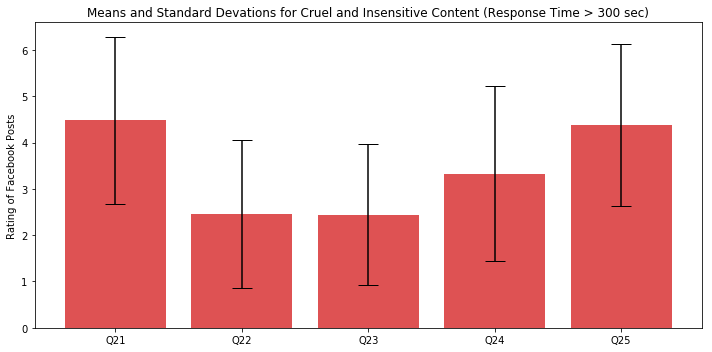

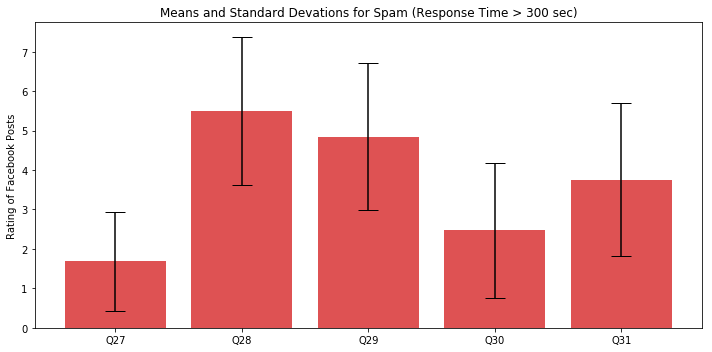

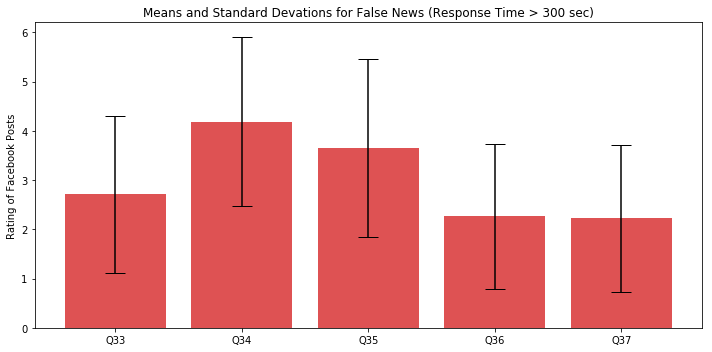

In [120]:
# Define function to create bar graph with error bars   
def plot_figs(index, means, sds, standard, file_name):
    fig = plt.figure(figsize=(10,5))
    plt.bar(index, means, yerr=sds, align='center', alpha=0.8, ecolor='black', capsize=10, color='tab:red')
    plt.ylabel('Rating of Facebook Posts')
    plt.xticks(index)
    plt.title('Means and Standard Devations for %s (Response Time > 300 sec)' % standard)
    plt.tight_layout()
    plt.savefig('Figures_dropped_300/%s_bar_plot_with_error_bars_dropped_300.png' % file_name, overwrite=True)
    plt.show()

# Plot and save figures
plot_figs(index, means, sds, 'All Five Standards', 'all')  
plot_figs(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
plot_figs(nudity_index, nudity_means, nudity_sds, 'Adulty Nudity and Sexual Activity', 'nudity')
plot_figs(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Content', 'cruel')
plot_figs(spam_index, spam_means, spam_sds, 'Spam', 'spam')
plot_figs(false_index, false_means, false_sds, 'False News', 'false')

In [121]:
def create_stat_charts(index, means, sds, standard, file_name):
    t = Table([index, means, sds], names=('index', 'means', 'sds'), meta={'name': 'Table on Survey 1 %s Means and Variances (Response Time > 300 seconds)' % file_name})
    ascii.write(t, 'Tables_dropped_300/table_of_%s_means_sds_dropped_300.csv' % file_name, format='csv', fast_writer=False, overwrite=True)
    print(t)
# Create charts with means and variances
create_stat_charts(index, means, sds, 'All', 'all')
create_stat_charts(hate_index, hate_means, hate_sds, 'Hate Speech', 'hate')
create_stat_charts(nudity_index, nudity_means, nudity_sds, 'Adult Nudity and Sexual Activity', 'nudity')
create_stat_charts(cruel_index, cruel_means, cruel_sds, 'Cruel and Insensitive Speech', 'cruel')
create_stat_charts(spam_index, spam_means, spam_sds, 'Spam', 'spam')
create_stat_charts(false_index, false_means, false_sds, 'False News', 'false')

index means   sds  
----- ------ ------
   Q3 3.5831 1.6616
   Q4 5.8174 1.4417
   Q5 3.2343  1.989
   Q6 1.4469 1.1107
   Q7 3.0572 1.8586
  Q10 4.3052 1.7137
  Q12 1.9046 1.2481
  Q14  2.248 1.5594
  Q16 1.7738 1.2509
  Q18 3.7166 1.7737
  ...    ...    ...
  Q25 4.3815  1.749
  Q27 1.6812 1.2676
  Q28 5.4932 1.8819
  Q29 4.8447 1.8677
  Q30 2.4687  1.707
  Q31 3.7602 1.9299
  Q33 2.7084 1.5951
  Q34 4.1853 1.7213
  Q35  3.654  1.809
  Q36  2.267 1.4744
  Q37 2.2234 1.4927
Length = 25 rows
index means   sds  
----- ------ ------
   Q3 3.5831 1.6616
   Q4 5.8174 1.4417
   Q5 3.2343  1.989
   Q6 1.4469 1.1107
   Q7 3.0572 1.8586
index means   sds  
----- ------ ------
  Q10 4.3052 1.7137
  Q12 1.9046 1.2481
  Q14  2.248 1.5594
  Q16 1.7738 1.2509
  Q18 3.7166 1.7737
index means   sds  
----- ------ ------
  Q21 4.4823 1.7989
  Q22 2.4496  1.596
  Q23 2.4441 1.5224
  Q24 3.3297 1.8959
  Q25 4.3815  1.749
index means   sds  
----- ------ ------
  Q27 1.6812 1.2676
  Q28 5.4932 1.8819
  Q

### Bar Graphs for Each Question

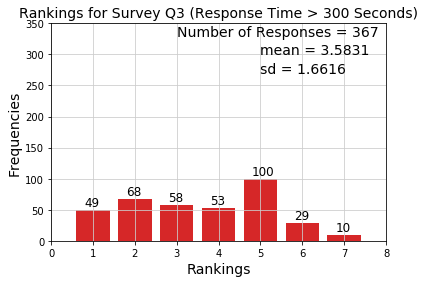

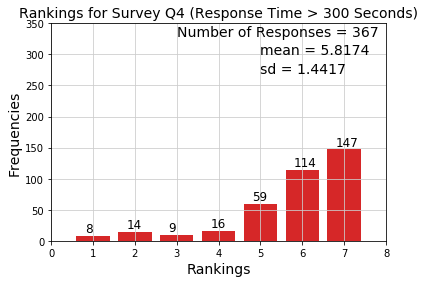

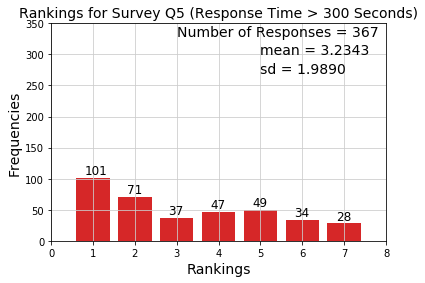

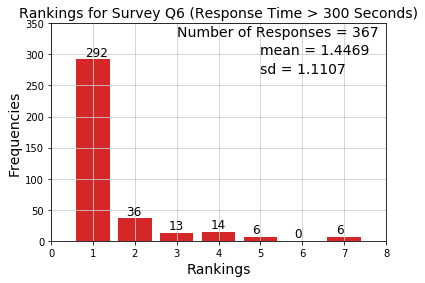

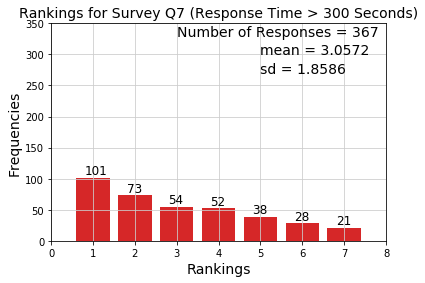

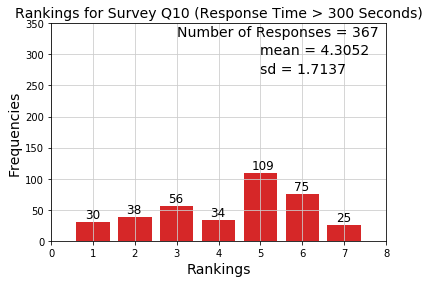

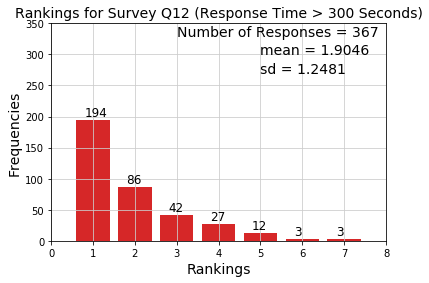

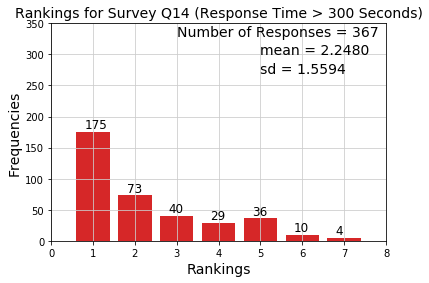

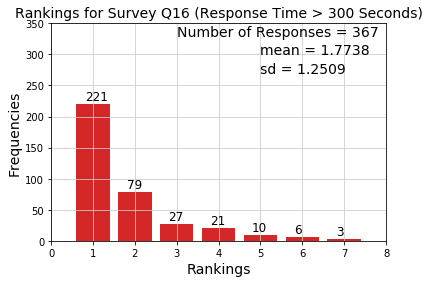

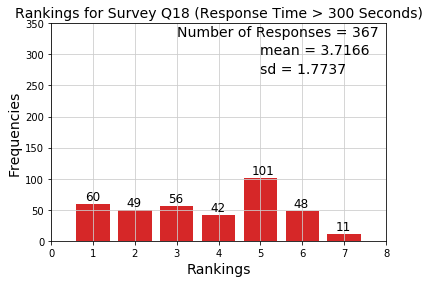

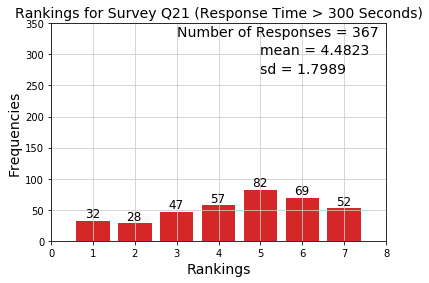

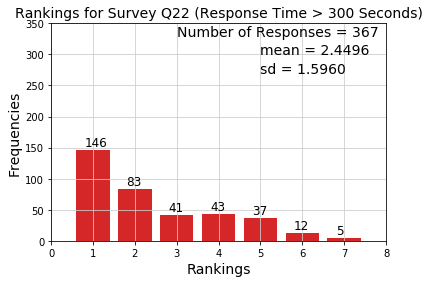

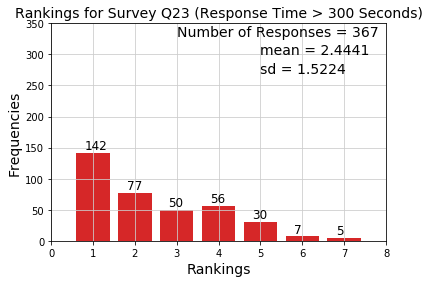

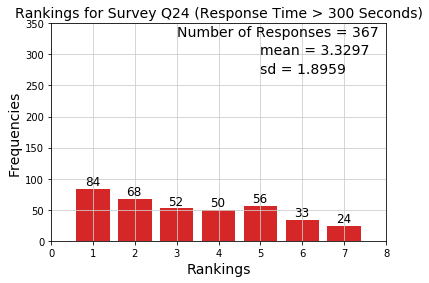

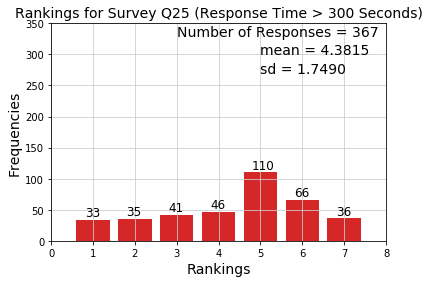

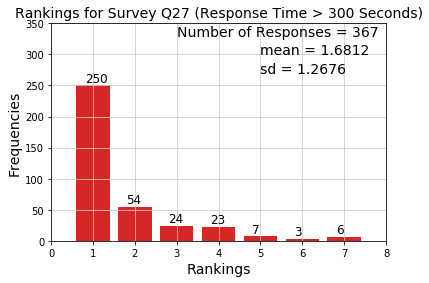

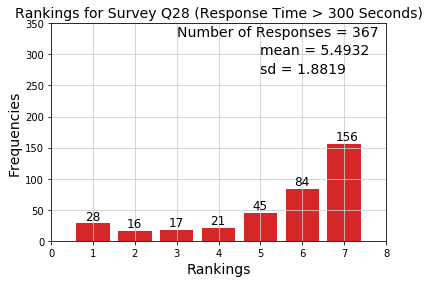

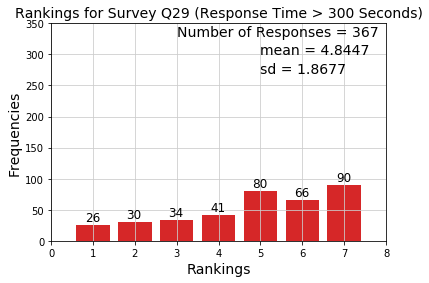

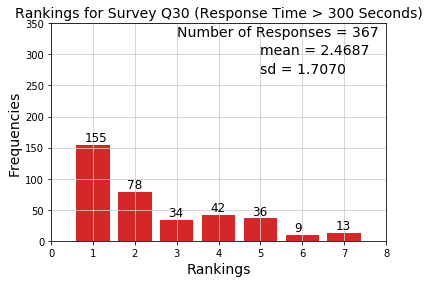

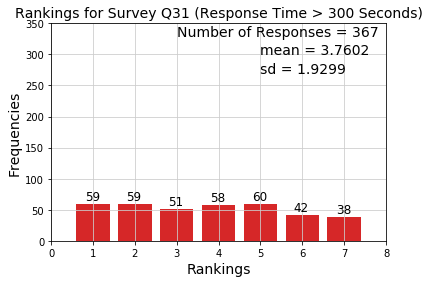

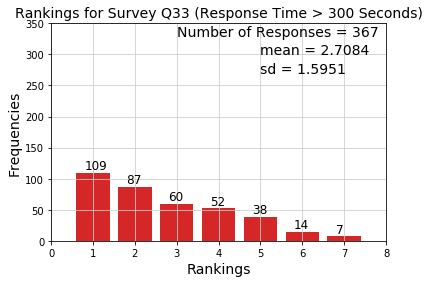

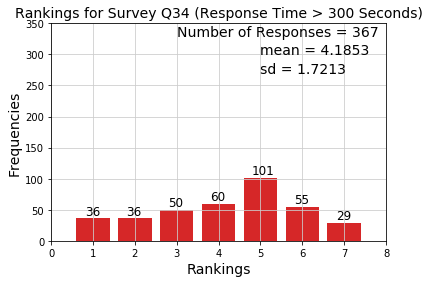

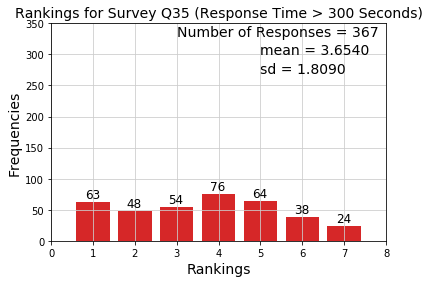

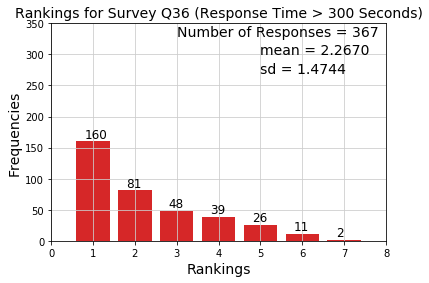

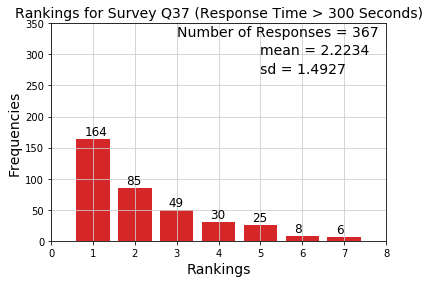

In [122]:
def get_counts(data):
    prev = 0
    final_counts = []
    counts = Counter(data.iloc[0])
    counts = OrderedDict(sorted(counts.items()))
    for key, value in counts.items():
        if key-1 != prev:
            final_counts.append(0)
        prev = key
        final_counts.append(value)
    return final_counts

def graph(data):
    for i in range(25):
        data, index = isolate_data(i, i+1)
        counts = get_counts(data)
        bar_spacing = list(range(1, 8, 1))
        plt.bar(bar_spacing, counts, color='tab:red')
        for j in range(7):
            plt.text(x=bar_spacing[j]-0.2, y=counts[j]+6, s=counts[j], fontsize=12)
        plt.xlabel('Rankings', fontsize=14)
        plt.ylabel('Frequencies', fontsize=14)
        plt.title('Rankings for Survey %s (Response Time > 300 Seconds)' % index[0], fontsize=14)
        plt.text(3, 330,'Number of Responses = %i' % response_numbers, fontsize=14)
        plt.text(5, 300,'mean = %.4f' % means[i], fontsize=14)
        plt.text(5, 270,'sd = %.4f' % sds[i], fontsize=14)
        plt.axis([0, 8, 0, 350])
        plt.grid(True, ls="-", color='0.8')
        plt.savefig('Figures_dropped_300/%s_ranking_bar_plot_dropped_300.png' % index[0], overwrite=True)
        plt.show()
        
graph(df)